In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [30]:
df = pd.read_parquet('clean.parquet')

In [31]:
df.sample(10)

,Education,Marital_Status,Income,Recency,NumDealsPurchases,Response,Complain,MntSpent,NumPurchases,Age,DaysEnrolled
62,PhD,Single,38236.000000,2,4,0,0,76,7,56,3806
482,Master,Married,76234.000000,21,1,0,0,736,22,52,3551
2164,Master,Together,17144.000000,96,5,0,0,39,7,64,3658
977,Graduation,Married,22063.000000,43,2,0,0,30,5,52,3849
1177,Graduation,Widow,72298.000000,52,1,0,0,829,13,75,3428
224,Master,Single,39763.000000,9,2,1,0,141,8,53,3971
1375,PhD,Married,51563.000000,60,1,0,0,1214,18,37,4425
494,Graduation,Together,18227.000000,21,1,0,0,10,3,37,4211
1693,Master,Widow,52247.251354,75,1,1,0,1148,21,81,3766
2155,Graduation,Single,68655.000000,95,1,0,0,1307,20,36,4153


### One-Hot Encoding for Categorical Values

In [32]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first= True) 
    data = data.drop(column, axis = 1)
    data = data.join(encoded)
    return data

In [33]:
df = one_hot_encode(df, 'Education')
df = one_hot_encode(df, 'Marital_Status')

In [34]:
df.dtypes

Income               float64
Recency                int64
NumDealsPurchases      int64
Response               int64
Complain               int64
MntSpent               int64
NumPurchases           int64
Age                    int64
DaysEnrolled           int64
Basic                   bool
Graduation              bool
Master                  bool
PhD                     bool
Married                 bool
Single                  bool
Together                bool
Widow                   bool
dtype: object

<Axes: xlabel='MntSpent', ylabel='Income'>

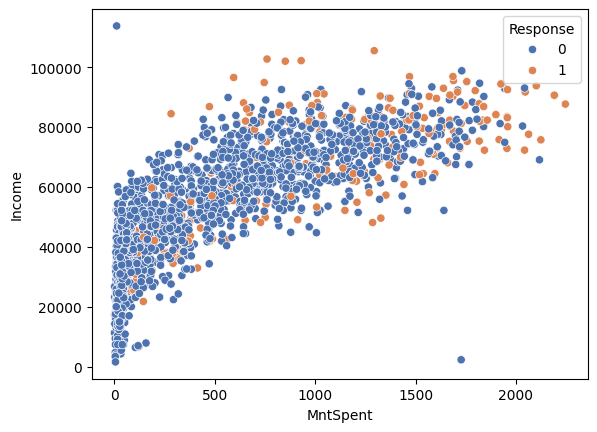

In [35]:
sns.scatterplot(data=df, x='MntSpent', y='Income', hue='Response', palette='deep')